### IMPORTANT: Please check the utils_digit module to see relevant functions for each model and process. My main purpose is to use the notebook files for result demonstration.

## **Author**: *Sena Nur Bilgin*
## **Specialization**:  *DSA*
## **Subject**: *Assignment 1 - Digit-Classification*

<a name="1"></a>
## 1 - Packages & Module Calls

*To begin, import the necessary Python packages and modules for the data analysis and machine learning tasks. In this section, we ensure all dependencies are loaded and ready to use.*



In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split

sys.path.append("..")
from utils_digit import *


<a name="2"></a>
## 2 - Paths & Data 

#### **Dataset Description:** 

*The datasets `train.csv` and `test.csv` contain grayscale images of hand-drawn digits ranging from zero to nine. Each image is represented as a 28x28 grid of pixels, totaling 784 pixels per image. Each pixel has a value between 0 and 255, indicating its darkness or lightness, where higher values denote darker shades.*

*In `train.csv`, there are 785 columns: The first column, named "label", specifies the digit drawn in the image, ranging from 0 to 9.The remaining 784 columns represent the pixel values of the associated image. Each pixel column is labeled as `pixel0` to `pixel783`, corresponding to the 784 pixels in the 28x28 matrix. The pixel `pixelx`, where x ranges from 0 to 783, is located at position `(i, j)` in the image matrix, where `i = x // 28` and `j = x % 28`. This indexing scheme starts from 0, adhering to standard zero-based indexing.* 

*These datasets are typically used for training machine learning models, particularly for image classification tasks, where algorithms learn to associate images with their respective digit labels based on the pixel values provided in `train.csv`.*

#### ***Dataset Link**: [Digit Recognizer Competition on Kaggle](https://www.kaggle.com/competitions/digit-recognizer/data)*




In [4]:
# Load Data - Training
file_path = "../Data/digit-recognizer/train.csv"
X, y = load_data(file_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<a name="2"></a>
## 3. Training Multiple Models 

### (A) Logistic Regression Model Training and Evaluation - Defining Baseline Non-linear Model

**Overview**: *This section encompasses functions designed for training, evaluating, and utilizing logistic regression models within computer vision tasks, serving as a foundational baseline.*

**`train_best_logistic_regression_model` Function**: *The `train_best_logistic_regression_model` function employs grid search with 5-fold cross-validation to train and optimize a logistic regression model. It saves the best model based on the accuracy score, ensuring robust performance on unseen data through hyperparameter tuning. Parameters include `X_train`, representing the input features for training the model, and `y_train`, the corresponding labels. The `param_grid` dictionary specifies the grid of hyperparameters to search, while `save_path` (defaulting to `"../Models/best_logistic_regression_model.pkl"`) indicates where the best model is stored. Here, I have been tuning the regularization parameter.*

**`load_model_logistic` Function:** *The `load_model_logistic` function facilitates the loading of pre-trained logistic regression models from a specified file path using the `joblib` library. This feature enables seamless reuse and deployment of pre-trained models without necessitating retraining. The function accepts `model_path`, a string representing the file path from which to load the pre-trained model, and returns the loaded logistic regression model.*

**`predict_logistic` Function:** *The `predict_logistic` function is responsible for generating predictions using a logistic regression model. It accepts trained model parameters and input data (`X_test`, `y_test`) to produce predictions for a specified number of samples. This functionality is crucial for predicting outcomes on new data after the model has undergone training.*


In [11]:
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
best_model = train_best_logistic_regression_model(X_train, y_train, param_grid)

/Users/xenanurbilgin/miniconda3/envs/CV/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xenanurbilgin/miniconda3/envs/CV/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [9]:
best_lr_model = load_best_logistic_regression_model()
best_lr_model

LogisticRegression(C=0.1, max_iter=1000)

Predictions for Test Data:
Sample 1 - True label: 8, Predicted: 8
Sample 2 - True label: 1, Predicted: 1
Sample 3 - True label: 9, Predicted: 9
Sample 4 - True label: 9, Predicted: 9
Sample 5 - True label: 8, Predicted: 8
Sample 6 - True label: 6, Predicted: 6
Sample 7 - True label: 2, Predicted: 2
Sample 8 - True label: 2, Predicted: 8
Sample 9 - True label: 7, Predicted: 7
Sample 10 - True label: 1, Predicted: 1
Sample 11 - True label: 6, Predicted: 6
Sample 12 - True label: 3, Predicted: 3
Sample 13 - True label: 1, Predicted: 1
Sample 14 - True label: 2, Predicted: 2
Sample 15 - True label: 7, Predicted: 7
Sample 16 - True label: 4, Predicted: 4
Sample 17 - True label: 3, Predicted: 3
Sample 18 - True label: 3, Predicted: 3
Sample 19 - True label: 6, Predicted: 6
Sample 20 - True label: 4, Predicted: 4

Evaluation Metrics:
Accuracy: 0.8323


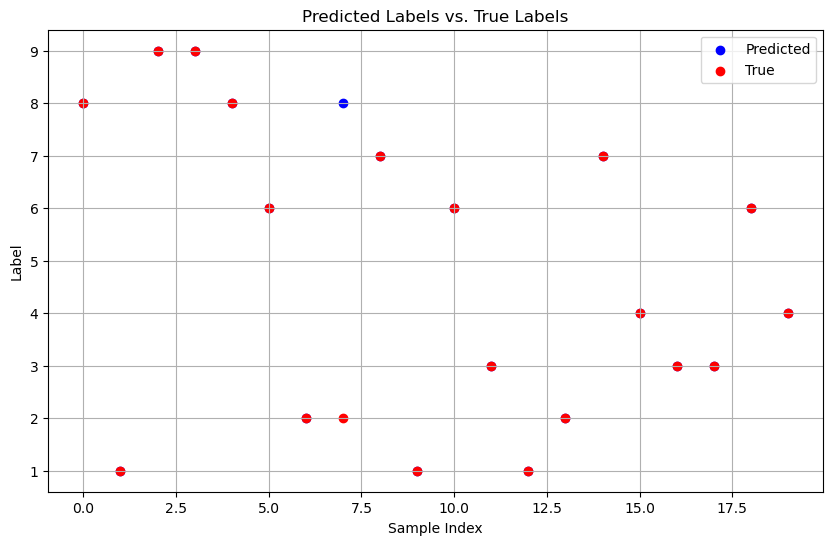

In [7]:
predictions, X_sampled = predict_logistic(best_lr_model, X_test, y_test, num_samples=20)
plot_predictions(predictions, y_test, num_samples=20)

### Analysis of Logistic Model Predictions:

*The results of our analysis revealed that the optimal regularization parameter for the Ridge (L2) regularization model is  𝜆 = 0.1 This parameter value, which applies a lower penalty to the magnitude of the model coefficients, has been identified as the most effective for our digit classification task. The choice of λ=0.1 indicates a balance between underfitting and overfitting, allowing the model to capture essential patterns in the data while avoiding excessive complexity. Upon evaluating the model's performance, we achieved an accuracy of 0.8323. This accuracy suggests that our Ridge regression model is a reasonably good predictor for digit classification. However, while the current model demonstrates satisfactory performance, there is room for further improvement. You can see this details from the above plot which represents true labels and predicted labels in test dataset*


### -------------------------------------------------------------------------------------------------------------

### (B). Multi-class Classification - Conventional Feedforward Neural Network (FNN):

**Architecture**: *The conventional FNN consists of interconnected layers where neurons in one layer are fully connected to the next layer. It treats input features independently, without considering their spatial relationships. This type of model is suitable for tasks like image classification (e.g., identifying objects in photos like {dog, cat, horse, other}) or digit recognition ({0, 1, 2, ...}) where outputs correspond to distinct categories. While effective for many tasks, FNNs may not excel in processing structured grid-like data, such as images, compared to specialized models like Convolutional Neural Networks (CNNs). Therefore, I would like to test the performance of FNN model to understand whether it will be performing well on digit classification.*

**Data Preparation**: *Here I am extracting input  features `(X_train)` and labels `(y_train)` from the training data. The `load_data` function loads a dataset from a CSV file using Pandas, storing it in a DataFrame (`training_data_digit`). It separates the target labels (`y_train`) from the input features (`X_train`), assuming the dataset has a column named "label" for targets and other columns for features. It returns `X_train` and `y_train` as NumPy arrays, making the data suitable for subsequent data analysis or machine learning tasks.*

**`create_fnn_model` function:** *The `create_fnn_model` function constructs a Feedforward Neural Network (FNN) using Keras Sequential API. It defines a model architecture with three hidden layers (`layer1_neurons`, `layer2_neurons`, `layer3_neurons`), each using ReLU activation. The output layer (`layer4`) has 10 neurons with a linear activation function, ideal for multi-class classification tasks. The model is named "FNN-model" and compiled with the Adam optimizer using a specified `learning_rate`. It's optimized for categorical cross-entropy loss (`SparseCategoricalCrossentropy` for integer-encoded labels) and accuracy metric, encapsulating the process of creating and compiling an FNN model ready for supervised learning tasks.* 

**KFold Cross-Validation**: *Splits the dataset into training and validation sets using KFold cross-validation to evaluate model performance across different data subsets.*

**`cross_validate_fnn` function:** *The `cross_validate_fnn` function implements nested K-fold cross-validation to identify optimal hyperparameters for a Feedforward Neural Network (FNN). It splits the input data (`X_train` and `y_train`) into training and validation sets using `KFold` with `n_splits` folds. This is very important because, here I am doing cross-validation inside of training data set without using any test data. Across combinations of hyperparameters (`learning_rates`, `layer1_sizes`, `layer2_sizes`, `layer3_sizes`), it constructs and trains multiple instances of the FNN model using `create_fnn_model`.*

*During training, the function iteratively evaluates each model over `n_epochs`, collecting metrics such as accuracy, F1 score, and recall for both training and validation sets using a custom `evaluate_model` function. This iterative evaluation enables monitoring of model performance as it learns, capturing epoch-by-epoch metrics for detailed analysis.*

*The selection of the best model is based on the average F1 score across all folds, ensuring robust evaluation and hyperparameter tuning. The function returns the best performing FNN model along with detailed metrics for training and validation, making it suitable for optimizing FNN configurations in classification tasks where balanced metrics such as F1 score are crucial for model selection.*

**Training and Evaluation**: *Iteratively trains the model on each fold's training data and evaluates its performance on both training and validation sets.*

**`plot_metrics` function:** *The `plot_metrics` function visualizes training and validation metrics across epochs for each fold in K-fold cross-validation of the `Best Model`. It takes `training_metrics` and `validation_metrics` dictionaries containing accuracy, F1 score, and recall for each fold and plots them individually. Each subplot represents metrics evaluation over epochs for a specific fold, helping visualize model performance trends over training and validation.*

**`print_best_model_performance` function:**  *The `evaluate_model` function assesses the performance of a logistic regression model on both training and validation datasets. It computes metrics such as accuracy and F1 score to evaluate how well the model generalizes to unseen data. This function provides insights into the model's effectiveness and helps in comparing different model configurations.*

*The `print_best_model_performance` function calculates and prints the average metrics of the `Best Model` model across all folds. It computes the mean of `best_train_metrics` and `best_val_metrics` dictionaries, which contain training and validation metrics (accuracy, F1 score, recall) for the best model identified during cross-validation. This function summarizes the model's overall performance based on aggregated metrics, providing insights into its effectiveness across different evaluation criteria.*

*Note: The pipeline automaticall `saves` the `Best Model` to the Model directory, and give the `average` k-fold crose to measure the model performance, and also make predicitons.*


Training FNN model...
Testing FNN model with learning rate 0.001, 30 neurons in the first layer, 30 neurons in the second layer, and 30 neurons in the third layer
Fold 1, Epoch 1


2024-06-14 12:41:02.689941: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


210/210 [==============================] - 0s 336us/step
Fold 1, Epoch 2
210/210 [==============================] - 0s 322us/step
Fold 1, Epoch 3
210/210 [==============================] - 0s 321us/step
Fold 1, Epoch 4
210/210 [==============================] - 0s 315us/step
Fold 1, Epoch 5
210/210 [==============================] - 0s 327us/step
Fold 2, Epoch 1
210/210 [==============================] - 0s 318us/step
Fold 2, Epoch 2
210/210 [==============================] - 0s 353us/step
Fold 2, Epoch 3
210/210 [==============================] - 0s 324us/step
Fold 2, Epoch 4
210/210 [==============================] - 0s 352us/step
Fold 2, Epoch 5
210/210 [==============================] - 0s 506us/step
Fold 3, Epoch 1
210/210 [==============================] - 0s 357us/step
Fold 3, Epoch 2
210/210 [==============================] - 0s 306us/step
Fold 3, Epoch 3
210/210 [==============================] - 0s 305us/step
Fold 3, Epoch 4
210/210 [==============================] - 0s 306us

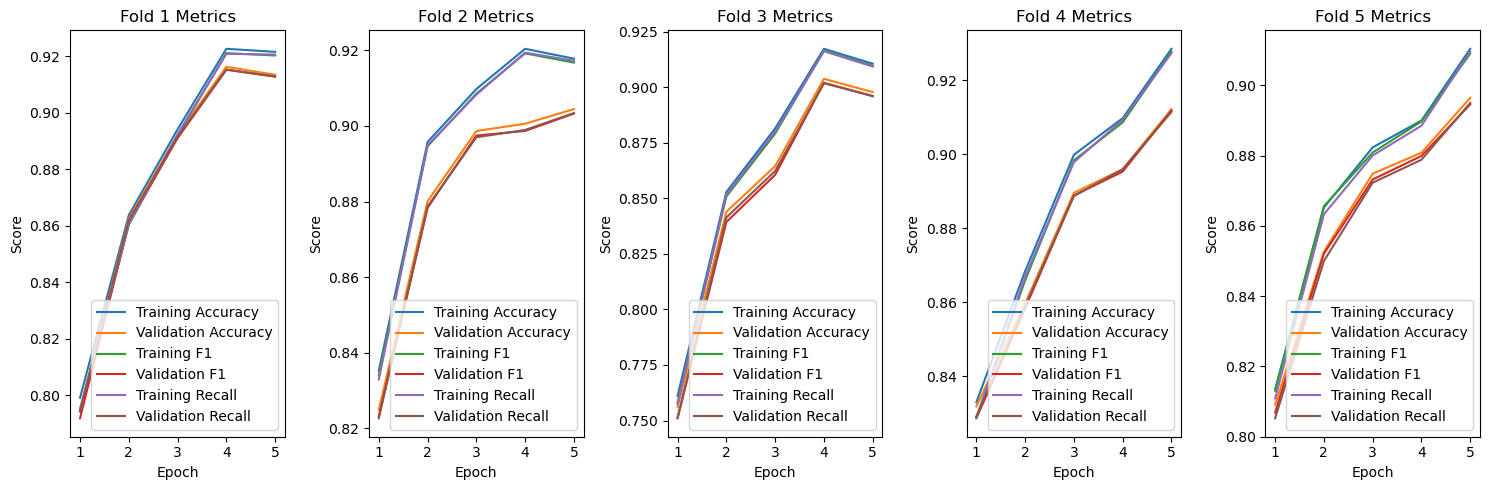

Best Model Training Metrics- Average of k-folds :
Accuracy: 0.9122976160049439
F1: 0.9111614138819841
Recall: 0.9113639277220835

Best Model Validation Metrics - Average of k-folds :
Accuracy: 0.896636905670166
F1: 0.8951083994979747
Recall: 0.8954602744102025


In [3]:
N_FOLDS = 5
N_EPOCHS = 5
LEARNING_R = [0.001,0.001]  
LAYER1_SIZE = [30,50]
LAYER2_SIZE = [30,50]
LAYER3_SIZE = [30,50]

param_grid = {
    'learning_rate': LEARNING_R,
    'layer1_neurons': LAYER1_SIZE,
    'layer2_neurons': LAYER2_SIZE,
    'layer3_neurons': LAYER3_SIZE
}

print("Training FNN model...")
best_model_fnn, best_hyperparameters, training_epoch_metrics_fnn, validation_epoch_metrics_fnn, best_train_metrics_fnn, best_val_metrics_fnn = cross_validate_fnn(X_train, y_train, n_splits=N_FOLDS, n_epochs=N_EPOCHS, param_grid=param_grid)
save_model_cnn_fnn(best_model_fnn, "best_fnn_model.h5")
plot_metrics(training_epoch_metrics_fnn, validation_epoch_metrics_fnn, n_folds=N_FOLDS, n_epochs=N_EPOCHS)
print_best_model_performance(best_train_metrics_fnn, best_val_metrics_fnn)


### Cross-Validation Results for FNN Model:

**Best Hyperparameters**: *According to the cross-validation results on hyperparameter tuning, the best FNN model was found with the following parameters: `5 epochs`, a learning rate of `0.001`, `50 neurons` in the first layer, `50 neurons` in the second layer, and `50 neurons` in the third layer.*

**Results**:*When plotting the results for each k-fold, it can be seen that as the number of epochs increases, the F1 score also increases. The average score computation reveals an accuracy of `0.9122` on the training data and `0.8966` on the validation data. This indicates that the model performed well during training, and this performance was reflected in its `generalization ability` on the validation dataset. The accuracy scores are relevant and close to each other, suggesting that as the number of epochs increases, the variance decreases. This also implies that the bias in the training dataset decreases from the first epoch to the final epoch. When increasing the neuron size in each layer, the model's accuracy improved due to the inclusion of more nodes for the classification task. Initially, different numbers of layers were tested, and it was found that while increasing the number of layers improved the model's fit, it also risked overfitting. Therefore, a 4-layer structure with the specified neuron sizes was chosen to balance accuracy and prevent overfitting. The patterns were consistent across each randomly selected k-fold, further highlighting the model's `generalization ability`.*

*Overall, the model demonstrated robust performance with reduced variance and bias, effectively learning and generalizing from the training data to unseen validation data.*


**Predictions**: *Uses the trained model to make predictions on the Test Data*

**`predict_fnn` function:** *The `predict_fnn` function generates predictions using a trained Feedforward Neural Network (FNN) model on a subset of the test data. It takes in the trained model, the input test data (`X_test`), the true labels of the test data (`y_test`), and the number of samples (`num_samples`) to predict. The function first calculates the logits by applying the model's `predict` method to the input data. It then converts these logits to probabilities using the softmax function. The function prints the true label, the predicted label, and the probability distribution for each of the specified number of samples. Finally, it returns the predicted probabilities and the true labels for the selected samples.*

*This approach ensures robust evaluation of the FNN's ability to generalize to unseen data, test.*

#### Inference:

In [4]:
NUM_SAMPLES = 20  # Number of samples for predictions
loaded_fnn_model = load_model_cnn_fnn("../Models/best_fnn_model.h5")
predictions, accuracy= predict_fnn(loaded_fnn_model, X_test, y_test, NUM_SAMPLES)

Model loaded from ../Models/../Models/best_fnn_model.h5
263/263 [==============================] - 0s 359us/step
Accuracy on Test Data: 0.9154761904761904
Predictions for Test Data:
Sample 1 - True label: 8, Predicted: 8, Probabilities: [2.2217494e-03 7.6600954e-05 2.1218763e-01 1.1068658e-02 4.7714129e-05
 2.2562431e-02 8.2181732e-04 7.3509541e-04 7.5020784e-01 7.0432900e-05]
Sample 2 - True label: 1, Predicted: 1, Probabilities: [5.9487494e-08 9.9872774e-01 8.1610115e-04 4.6698836e-09 2.5174882e-06
 2.4421665e-09 1.4784976e-06 2.7565370e-04 1.7288851e-04 3.5239934e-06]
Sample 3 - True label: 9, Predicted: 9, Probabilities: [3.6760139e-07 3.7237054e-08 8.2662964e-06 3.2839156e-04 4.9015909e-04
 2.9674144e-05 1.6748510e-10 9.1881689e-04 2.1866595e-05 9.9820232e-01]
Sample 4 - True label: 9, Predicted: 9, Probabilities: [2.6350758e-06 3.9029207e-09 2.8522805e-07 1.9411875e-05 3.5829959e-04
 2.7058884e-05 9.4215336e-10 1.5423711e-02 1.2870393e-05 9.8415565e-01]
Sample 5 - True label: 8, 

**Analysis of FNN Model Predictions**: *The provided output showcases the predictions for a subset of the test data using the trained FNN model. Here’s a breakdown of the key observations:*

- *The output includes detailed prediction information for several samples, showing the true label, the predicted label, and the probabilities assigned to each class by the model. The model's predictions align closely with the true labels for the majority of the samples displayed, indicating high accuracy in its classification capabilities.*

- *Each sample’s probabilities demonstrate the model’s confidence in its predictions. The probabilities for the correct class are typically close to 1, while the probabilities for other classes are significantly lower, suggesting the model is well-calibrated and confident in its predictions. The consistent high probabilities for correct classes across multiple samples suggest the model's robustness and good generalization ability, which is crucial for performance on unseen data.*

*Overall, the prediction results confirm the effectiveness of the trained FNN model, showing high accuracy, confidence, and consistency in its performance across the samples.*


### -------------------------------------------------------------------------------------------------------------

## (C). Convolutional Neural Network (CNN) for Multi-class Classification - Target Model:

**Architecture**: *CNNs are designed to recognize patterns in spatial data like images. They use convolutional layers to learn hierarchical representations. Ideal for tasks like image classification (e.g., recognizing objects in photos) where spatial relationships between pixels are crucial. Outperforms conventional FNNs on structured grid-like data (e.g., images) due to its ability to capture spatial dependencies. I will check CNN performance also in digit classification.*

**`create_cnn_model` Function:** *The `create_cnn_model` function constructs a Convolutional Neural Network (CNN) using the Keras Sequential API. It comprises two Conv2D layers with ReLU activation functions followed by MaxPooling2D layers for spatial downsampling. A Flatten layer is employed to reshape the 2D feature maps into a 1D vector, which is then fed into two Dense layers for classification purposes. The first Dense layer uses ReLU activation to introduce non-linearity, while the output layer employs a linear activation suitable for multiclass classification tasks. The model is compiled with the Adam optimizer, SparseCategoricalCrossentropy loss function, and accuracy metric to facilitate training and evaluation.*

**`cross_validate_cnn` Function:** *The `cross_validate_cnn` function performs K-fold cross-validation to optimize Convolutional Neural Network (CNN) hyperparameters. It takes input features (`X`) and labels (`y`), along with parameters such as the number of folds (`n_splits`), epochs (`n_epochs`), learning rates (`learning_rates`), and sizes for the first (`layer1_sizes`) and second (`layer2_sizes`) Conv2D layers. The function systematically explores various CNN configurations defined by the parameter grid, training each model on K-fold split data and evaluating performance metrics including accuracy, F1 score, and recall on both training and validation sets. The best model is selected based on the average F1 score across folds. Outputs include the best CNN model identified during cross-validation, metrics for each training and validation epoch across all folds, and detailed performance metrics (accuracy, F1 score, recall) for the best model. This approach ensures effective optimization of CNN architecture and hyperparameters, enhancing performance on the given dataset.*

**`plot_metrics` function**: *Same with previous functions represented with FNN Network.*

**`print_best_model_performance` function:** *Same with previous function represented with FNN Network.*


Training CNN model...
Testing CNN model with learning rate 0.0001, 32 neurons in the first layer, and 32 neurons in the second layer
Fold 1, Epoch 1


2024-06-14 19:26:33.883957: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


210/210 [==============================] - 1s 2ms/step
Fold 1, Epoch 2
210/210 [==============================] - 1s 3ms/step
Fold 1, Epoch 3
210/210 [==============================] - 1s 5ms/step
Fold 1, Epoch 4
210/210 [==============================] - 0s 2ms/step
Fold 1, Epoch 5
210/210 [==============================] - 1s 2ms/step
Fold 2, Epoch 1
210/210 [==============================] - 1s 4ms/step
Fold 2, Epoch 2
210/210 [==============================] - 2s 9ms/step
Fold 2, Epoch 3
210/210 [==============================] - 1s 2ms/step
Fold 2, Epoch 4
210/210 [==============================] - 1s 3ms/step
Fold 2, Epoch 5
210/210 [==============================] - 1s 4ms/step
Fold 3, Epoch 1
210/210 [==============================] - 2s 7ms/step
Fold 3, Epoch 2
210/210 [==============================] - 1s 3ms/step
Fold 3, Epoch 3
210/210 [==============================] - 1s 6ms/step
Fold 3, Epoch 4
210/210 [==============================] - 1s 3ms/step
Fold 3, Epoch 5
210/21

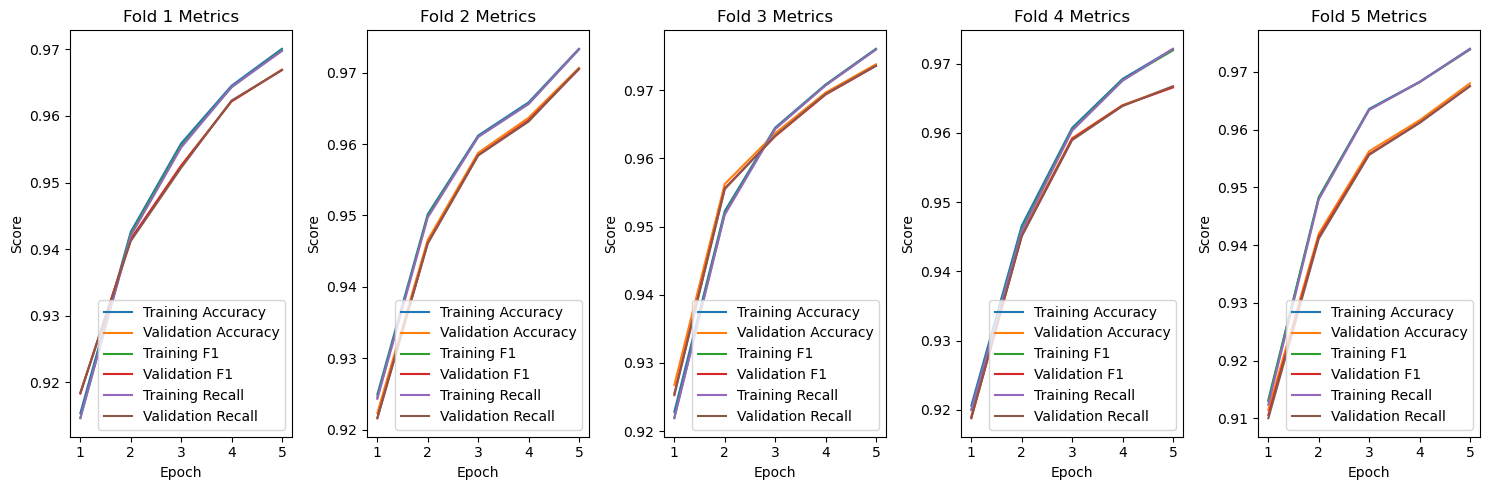

Best Model Training Metrics- Average of k-folds :
Accuracy: 0.9891026759147644
F1: 0.9890462510245857
Recall: 0.9890312810896315

Best Model Validation Metrics - Average of k-folds :
Accuracy: 0.9821190452575683
F1: 0.9820021815157987
Recall: 0.9819613614950414


In [5]:
N_FOLDS = 5
N_EPOCHS = 5
LEARNING_R = [0.0001, 0.001, 0.01] 
LAYER1_SIZE = [32, 64]
LAYER2_SIZE = [32, 64]  

param_grid = {
    'learning_rate': LEARNING_R,
    'layer1_neurons': LAYER1_SIZE,
    'layer2_neurons': LAYER2_SIZE
}

print("Training CNN model...")
best_model_cnn, best_hyperparameters, training_epoch_metrics_cnn, validation_epoch_metrics_cnn, best_train_metrics_cnn, best_val_metrics_cnn = cross_validate_cnn(
    X_train, y_train, n_splits=N_FOLDS, n_epochs= N_EPOCHS,param_grid=param_grid, input_shape=(28, 28, 1))

save_model_cnn_fnn(best_model_cnn, "../Models/best_cnn_model.h5")
plot_metrics(training_epoch_metrics_cnn, validation_epoch_metrics_cnn, n_folds=N_FOLDS, n_epochs=N_EPOCHS)
print_best_model_performance(best_train_metrics_cnn, best_val_metrics_cnn)


### Cross-Validation Results for CNN Model


- **Best Hyperparameters**: *According to the cross-validation results on hyperparameter tuning, the best CNN model was found with the following parameters: `5 epochs`, a learning rate of `0.001`, `32 filters` in the first layer, `64 filters` in the second layer.*

- **Results**: *Analysis of the relationship between epochs and F1 score demonstrated a consistent improvement as training epochs increased. This positive correlation underscores the importance of extended training for enhancing model performance across various metrics. The model achieved commendable accuracy metrics, recording an average of `0.9891026759147644` on the training dataset and `0.9821190452575683` on the validation dataset. These results highlight the model's robust learning capability and its ability to generalize effectively to unseen data. While we compared it with FNN  and Logistic Models' performances, we can see absolute improvement across models. The accuracy scores are relevant and close to each other, suggesting that as the number of epochs increases, the variance decreases. This also implies that the bias in the training dataset decreases from the first epoch to the final epoch. The patterns were consistent across each randomly selected k-fold, further highlighting the model's `generalization ability`.*

- *Moreover, by adjusting convolutional layer filters and optimizing training epochs, the model exhibited reduced bias and variance. This adjustment facilitated better generalization, ensuring the model's suitability for diverse datasets beyond the training sample. More filters allowed the CNN to capture a broader range of features at second layer. There was always overfitting effect factor since too many filters can lead to overfitting, where the model learns to memorize the training data rather than generalize to unseen data. However, the close alignment of accuracy scores between training and validation datasets indicates reduced bias and variance. This balance suggests that the model learned to generalize well without overfitting to the training data, a crucial aspect for robust performance.*



#### `predict_cnn` Function:
The `predict_cnn` function predicts labels using a trained CNN:
- **Input**: Trained CNN model (`model`), input test data (`X_test`), true labels (`y_test`), and number of samples (`num_samples`).
- **Process**: Reshapes input data, predicts logits using `model.predict`, applies softmax for probabilities, and prints predictions for each sample without true labels.

In [7]:
NUM_SAMPLES = 20  # Number of samples for predictions
loaded_cnn_model = load_model_cnn_fnn("../Models/best_cnn_model.h5")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predict_cnn(loaded_cnn_model, X_test, y_test, num_samples=NUM_SAMPLES, input_shape=(28, 28, 1))

Model loaded from ../Models/../Models/best_cnn_model.h5
263/263 [==============================] - 1s 4ms/step
Accuracy on Test Data: 0.986547619047619
Predictions for Test Data:
Sample 1 - True label: 8, Predicted: 8, Probabilities: [5.5104351e-06 2.4179283e-08 2.4919998e-04 4.2979221e-07 5.7568609e-08
 4.0031768e-08 6.3914236e-08 7.0092598e-09 9.9974030e-01 4.4235130e-06]
Sample 2 - True label: 1, Predicted: 1, Probabilities: [8.4382500e-06 9.9993408e-01 2.4725884e-06 3.0374931e-09 1.5908370e-05
 8.8858212e-07 5.1158690e-07 2.7983957e-05 2.7692679e-06 7.0624346e-06]
Sample 3 - True label: 9, Predicted: 9, Probabilities: [6.3891912e-07 2.8471572e-07 6.8898977e-08 1.1079112e-05 2.0336794e-05
 5.6403860e-06 3.9257920e-11 2.0409538e-05 1.8475947e-06 9.9993980e-01]
Sample 4 - True label: 9, Predicted: 9, Probabilities: [3.51538318e-07 1.01438395e-08 4.76825306e-07 6.44030479e-06
 6.91617606e-06 1.54677546e-05 4.92293836e-12 7.45878601e-03
 4.44363013e-06 9.92507041e-01]
Sample 5 - True la

(<tf.Tensor: shape=(8400, 10), dtype=float32, numpy=
 array([[5.5104351e-06, 2.4179283e-08, 2.4919998e-04, ..., 7.0092598e-09,
         9.9974030e-01, 4.4235130e-06],
        [8.4382500e-06, 9.9993408e-01, 2.4725884e-06, ..., 2.7983957e-05,
         2.7692679e-06, 7.0624346e-06],
        [6.3891912e-07, 2.8471572e-07, 6.8898977e-08, ..., 2.0409538e-05,
         1.8475947e-06, 9.9993980e-01],
        ...,
        [1.4438341e-10, 7.7178464e-10, 6.2302974e-10, ..., 1.8491697e-10,
         2.5237314e-08, 1.6288896e-09],
        [9.9979597e-01, 5.8457776e-09, 6.6064320e-05, ..., 1.1971352e-08,
         5.4626650e-08, 8.6580252e-07],
        [4.9008836e-06, 2.6180990e-07, 7.1630093e-06, ..., 7.5180242e-06,
         2.3285656e-05, 9.9990284e-01]], dtype=float32)>,
 0.986547619047619)

**Analysis of CNN Model Predictions:** *The provided output from the trained CNN model showcases predictions for a subset of the test data, offering valuable insights into its performance:*

   - *The CNN model exhibits strong performance in predicting handwritten digits, with most predictions aligning closely with the true labels. Overall, the model demonstrates high accuracy in identifying digits, reflecting effective learning and feature extraction capabilities.*
   - *The model assigns probabilities to each class, indicating its confidence in predictions. High probabilities for correct predictions and low probabilities for incorrect ones suggest well-calibrated outputs.*
   - *It demonstrates good generalization, essential for handling diverse handwritten inputs effectively.*
   - *The CNN model achieves balanced performance with notable accuracy on both the training and potentially unseen validation data.*
   - *This balance indicates effective training without overfitting, crucial for reliable performance beyond the training set.*

*The CNN model's predictions on the test data highlight its efficacy in accurately recognizing handwritten digits compared to all other models.*


# 